In [ ]:
# install packages
import Pkg;
Pkg.add("DataFrames");
Pkg.add("CSV");
Pkg.add("Plots");
Pkg.add("StatsPlots");
Pkg.add("StatsBase");
Pkg.add("Missings");

In [4]:
# setup filepaths
path_source = string(@__DIR__,"\\..\\source");
path_dev = string(@__DIR__,"\\..\\dev");

In [8]:
# LOAD IN PACKAGES AND DATA
using DataFrames, CSV, Plots, StatsPlots, StatsBase, Missings
df = DataFrame(CSV.read(joinpath(path_dev,"19-21VAERSCOMB.csv"), DataFrame));

In [9]:
#EXPLORATORY DATA ANALYSIS
summary(df) #size of the dataset
first(df, 10) #display the first 10 rows
show(names(df)) #display colnames

["VAERS_ID", "YEAR", "RECVDATE", "STATE", "AGE_YRS", "CAGE_YR", "CAGE_MO", "SEX", "RPT_DATE", "SYMPTOM_TEXT", "DIED", "DATEDIED", "L_THREAT", "ER_VISIT", "HOSPITAL", "HOSPDAYS", "X_STAY", "DISABLE", "RECOVD", "VAX_DATE", "ONSET_DATE", "NUMDAYS", "LAB_DATA", "V_ADMINBY", "V_FUNDBY", "OTHER_MEDS", "CUR_ILL", "HISTORY", "PRIOR_VAX", "SPLTTYPE", "FORM_VERS", "TODAYS_DATE", "BIRTH_DEFECT", "OFC_VISIT", "ER_ED_VISIT", "ALLERGIES", "VAX_TYPE", "VAX_MANU", "VAX_LOT", "VAX_DOSE_SERIES", "VAX_ROUTE", "VAX_SITE", "VAX_NAME", "SYMPTOMS"]

In [10]:
df = df[(.!ismissing.(df.AGE_YRS)) .& (df.AGE_YRS .>= 16), :] #filter age >= 16

,VAERS_ID,YEAR,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE
,Int64,Int64,String,String?,Float64?,Int64?,Float64?,String,String?
1,794156,2019,01/01/2019,missing,69.0,69,missing,F,missing
2,794157,2019,01/01/2019,IL,68.0,68,missing,F,missing
3,794158,2019,01/01/2019,MA,62.0,62,missing,F,missing
4,794160,2019,01/01/2019,TX,79.0,79,missing,F,missing
5,794161,2019,01/01/2019,MN,57.0,57,missing,F,missing
6,794163,2019,01/01/2019,MA,65.0,65,missing,F,missing
7,794164,2019,01/01/2019,TX,57.0,57,missing,F,missing
8,794165,2019,01/01/2019,TX,80.0,80,missing,M,missing
9,794165,2019,01/01/2019,TX,80.0,80,missing,M,missing


In [11]:
vax_ct = countmap(df[!, :VAX_NAME])
sort(vax_ct, byvalue=true, rev=true)
death_ct = countmap(df[!, :DIED])
sort(death_ct, byvalue=true, rev=true)
threat_ct = countmap(df[!, :L_THREAT])
sort(threat_ct, byvalue=true, rev=true)
hos_ct = countmap(df[!, :HOSPITAL])
sort(hos_ct, byvalue=true, rev=true)

OrderedCollections.OrderedDict{Union{Missing, String}, Int64} with 2 entries:
  missing => 96778
  "Y"     => 6272

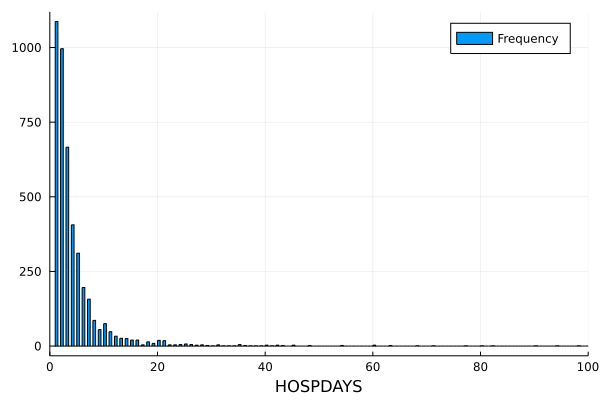

In [12]:
#Days in hospital Histogram
histogram(filter(x -> !(ismissing(x) || isnan(x)), df[!, :HOSPDAYS]),
    bins=600,xlim=(0,100),xlabel="HOSPDAYS",labels="Frequency")

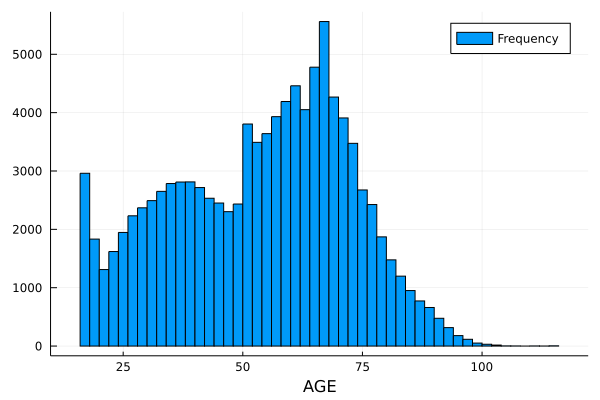

In [13]:
#Age Histogram
histogram(filter(x -> !(ismissing(x) || isnan(x)), df[!, :AGE_YRS]),
    xlabel="AGE",labels="Frequency")

In [14]:
#labeling of events as serious or non-serious
a = (df.DIED .== "Y") .| (df.L_THREAT .== "Y") .| (df.HOSPITAL .== "Y") .| (df.X_STAY .== "Y") .| (df.DISABLE .== "Y")
df.SERIOUS_EVENT = replace(a, missing => 0)
show(names(df))

["VAERS_ID", "YEAR", "RECVDATE", "STATE", "AGE_YRS", "CAGE_YR", "CAGE_MO", "SEX", "RPT_DATE", "SYMPTOM_TEXT", "DIED", "DATEDIED", "L_THREAT", "ER_VISIT", "HOSPITAL", "HOSPDAYS", "X_STAY", "DISABLE", "RECOVD", "VAX_DATE", "ONSET_DATE", "NUMDAYS", "LAB_DATA", "V_ADMINBY", "V_FUNDBY", "OTHER_MEDS", "CUR_ILL", "HISTORY", "PRIOR_VAX", "SPLTTYPE", "FORM_VERS", "TODAYS_DATE", "BIRTH_DEFECT", "OFC_VISIT", "ER_ED_VISIT", "ALLERGIES", "VAX_TYPE", "VAX_MANU", "VAX_LOT", "VAX_DOSE_SERIES", "VAX_ROUTE", "VAX_SITE", "VAX_NAME", "SYMPTOMS", "SERIOUS_EVENT"]

In [15]:
#count # of serious event
sum(df.SERIOUS_EVENT)
#size of entire dataset
summary(df) #size of the dataset

"103050×45 DataFrame"

In [17]:
#SERIOUS_EVENT =1 is serious and SERIOUS_EVENT=0 is non-serious adverse event
#find most frequent serious adverse event - pull from SYMPTOM1, SYMPTOM2, SYMPTOM3, SYMPTOM4, SYMPTOM5
#find most frequent non-serious adverse event - pull from SYMPTOM1, SYMPTOM2, SYMPTOM3, SYMPTOM4, SYMPTOM5
df_nonserious = df[df.SERIOUS_EVENT .== 0, :];
df_serious = df[df.SERIOUS_EVENT .== 1, :];
#select columns - SERIOUS_EVENT, VAERS_ID, SYMPTOM1, SYMPTOM2, SYMPTOM3, SYMPTOM4, SYMPTOM5

In [18]:
# write to dev
CSV.write(joinpath(path_dev,"19-21VAERSCOMB_clean.csv"), df);